# Image classification on CIFAR10 with CNN 

In [2]:
import tensorflow as tf

In [3]:
# Check whether there is GPU device with the system

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    #raise SystemError('GPU device not found')
    print('GPU device not found!')
else:
    print('Found GPU at: {}'.format(device_name))

GPU device not found!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
# Loading data 
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [7]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [29]:
def plot_images(img_data, img_label, rows, columns): 
    
    import random
    rand_index = random.sample(range(1, 100), rows*columns)
    # Class names 
    class_name = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship","Truck"]
    
    #seting axis names
    i = 1
    axes = []
    for r in range(rows):
        col_ax = []
        for c in range(columns): 
            tuple_name = 'ax'+str(i)
            col_ax.append(tuple_name)
        axes.append(tuple(col_ax))
        i+=1
    fig, axes = plt.subplots(rows, columns, figsize=(15, 7))
    
    i = 0
    for r in range(rows):
        temp = axes[r]
        for c in range(columns):
            temp[c].imshow(img_data[rand_index[i],:,:], cmap='gray')
            temp[c].set_title(class_name[img_label[rand_index[i]][0]])
            i+=1

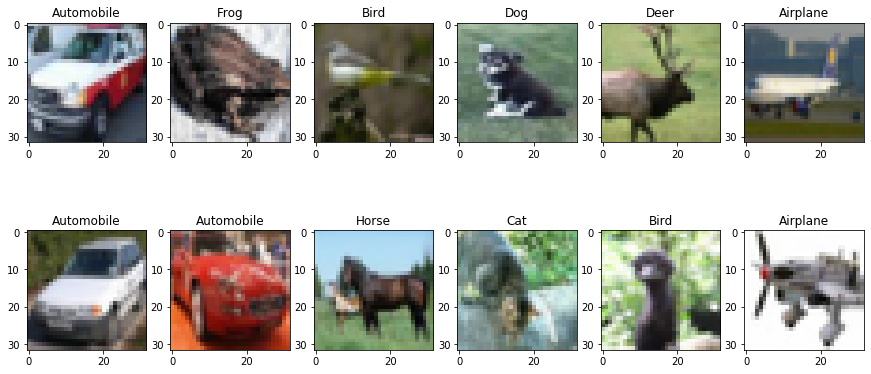

In [30]:
rows = 2
columns = 6
# Plot some random images from training data 
plot_images(X_train, y_train, rows = rows, columns = columns)

In [18]:
nRows,nCols,nDims = X_train.shape[1:]
X_train = X_train.reshape(X_train.shape[0], nRows, nCols, nDims)
X_test = X_test.reshape(X_test.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
X_train /= 255.0
X_test /= 255.0

y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [20]:
print('Original label 0 : ', y_train[0])
print('After conversion to categorical ( one-hot ) : ', y_test_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [21]:
def createModel():
    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(nClasses, activation='softmax'))
    
    return model

In [22]:
model1 = createModel()
batch_size = 256
epochs = 40
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [105]:
history = model1.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(X_test, y_test_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 86s 2ms/sample - loss: 2.1056 - accuracy: 0.2333 - val_loss: 1.7307 - val_accuracy: 0.3713
Epoch 2/40
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.6946 - accuracy: 0.3852 - val_loss: 1.4858 - val_accuracy: 0.4590
Epoch 3/40
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.4914 - accuracy: 0.4642 - val_loss: 1.3507 - val_accuracy: 0.5165
Epoch 4/40
50000/50000 [==============================] - 84s 2ms/sample - loss: 1.3393 - accuracy: 0.5233 - val_loss: 1.2997 - val_accuracy: 0.5293
Epoch 5/40
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.2224 - accuracy: 0.5667 - val_loss: 1.1202 - val_accuracy: 0.5979
Epoch 6/40
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.1229 - accuracy: 0.6033 - val_loss: 1.0364 - val_accuracy: 0.6355
Epoch 7/40
50000/50000 [==============================] 

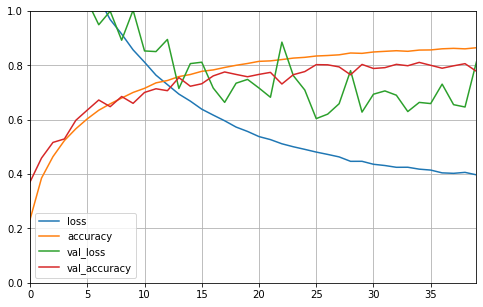

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()